 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# read in each of the CSV files as a DataFrame.
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# After reading each CSV file, sort each DataFrame in ascending order by the Date using sort_index. 
# Especially important when working with time series data as we want to make sure Date indexes go from earliest to latest.
whale_df.sort_index()
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# read in each of the CSV files as a DataFrame.
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# # read in each of the CSV files as a DataFrame.
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
sp500_df['Close'].apply(type).value_counts()

<class 'str'>    1649
Name: Close, dtype: int64

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').str.replace(',','')
sp500_df['Close'].dtypes

dtype('O')

In [12]:
# change data type to float
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [13]:
# Create new column to hold Daily Returns and Calculate Daily Returns

# Alt solution 
# sp500_df["Daily Returns"] = (sp500_df['Close']/(sp500_df["Close"].shift(1))-1)
# sp500_df.drop("Close", inplace=True, axis=1)

sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename Column
sp500_daily_returns.rename(columns = {'Close':'S&P 500'}, inplace = True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame

all_daily_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
all_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

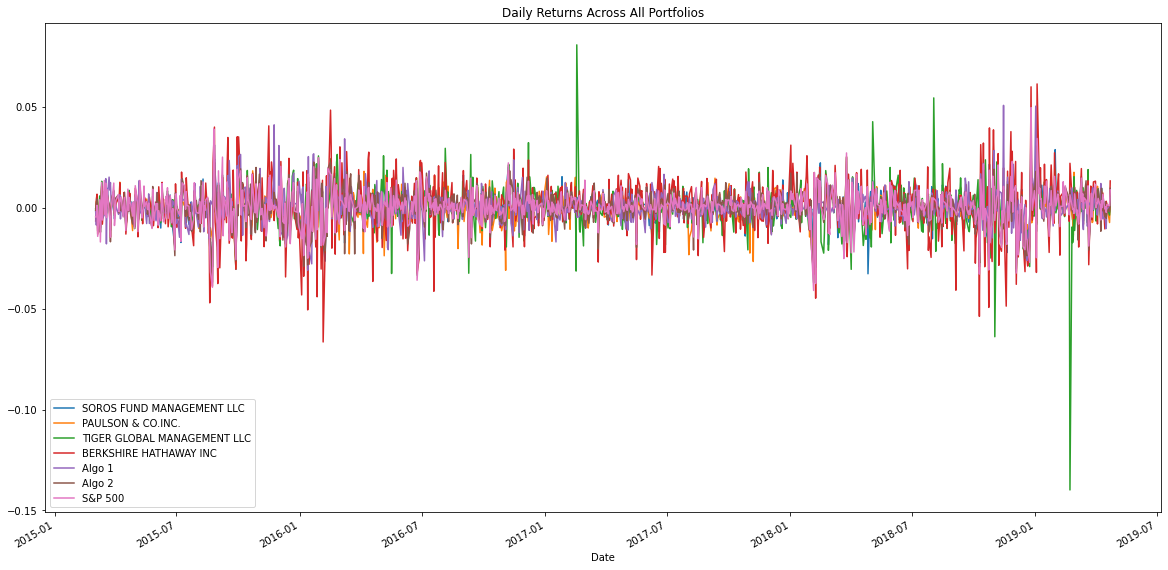

In [76]:
# Plot daily returns
all_daily_returns.plot(title="Daily Returns Across All Portfolios", figsize=(20,10), legend=True);

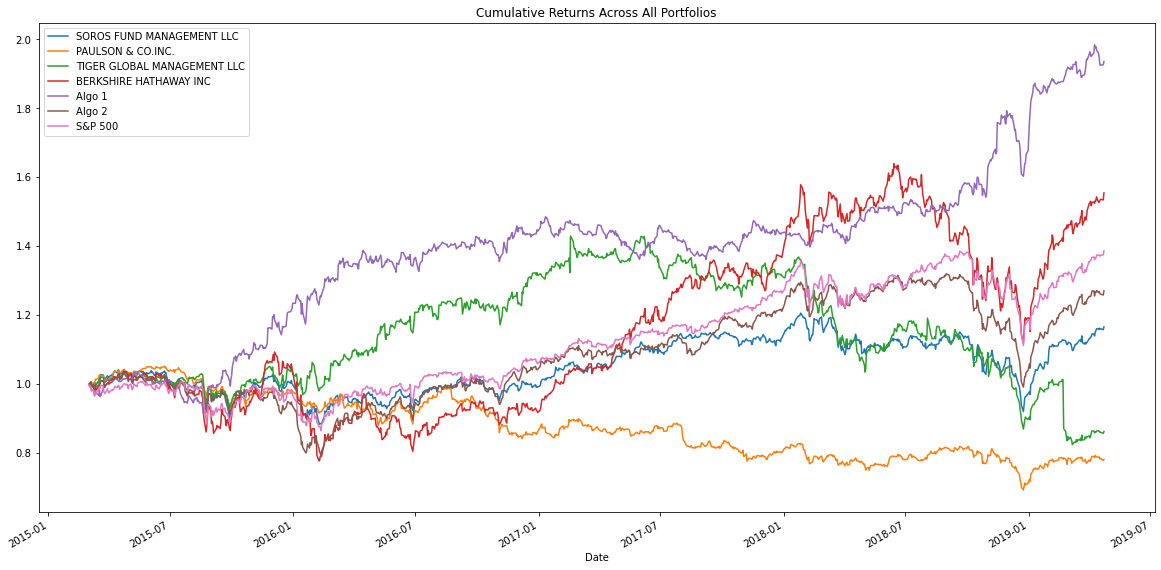

In [77]:
# Calculate the cumulative returns using the 'cumprod()' function and plot
all_cumu_returns = (1 + all_daily_returns).cumprod()
all_cumu_returns.plot(title="Cumulative Returns Across All Portfolios", figsize=(20,10), legend=True);

## *Performance Analysis*

The portfolios that outperform the S&P 500 are: Berkshire Hathaway and Algo 1 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [35]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = all_daily_returns.std()
daily_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

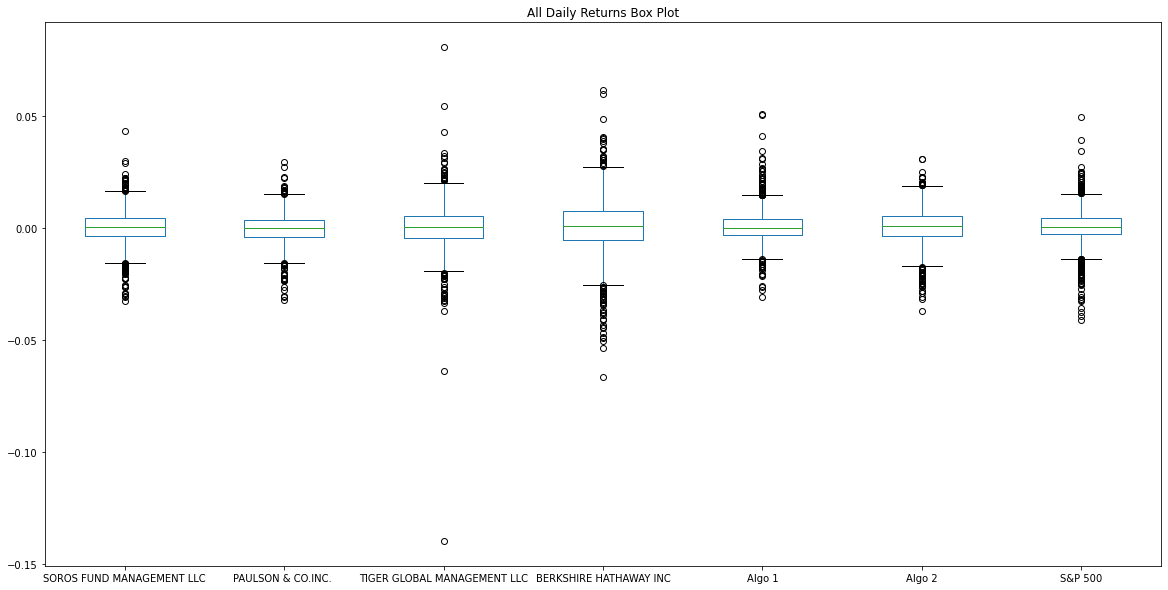

In [36]:
# Box plot for all portfolios
all_daily_returns.plot.box(title="All Daily Returns Box Plot", figsize=(20,10), legend=True);

## *Box Plot Analysis*

Tiger Global Management has the largest spread while Paulson & Co. has the smallest spread.

In [37]:
# Which portfolios are riskier than the S&P 500?
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [38]:
# Determine which portfolios are riskier than the S&P 500
daily_std > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

## *Risk Analysis*

The portfolios that are riskier than the S&P 500 are Tiger Global & Berkshire Hathaway.

In [39]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

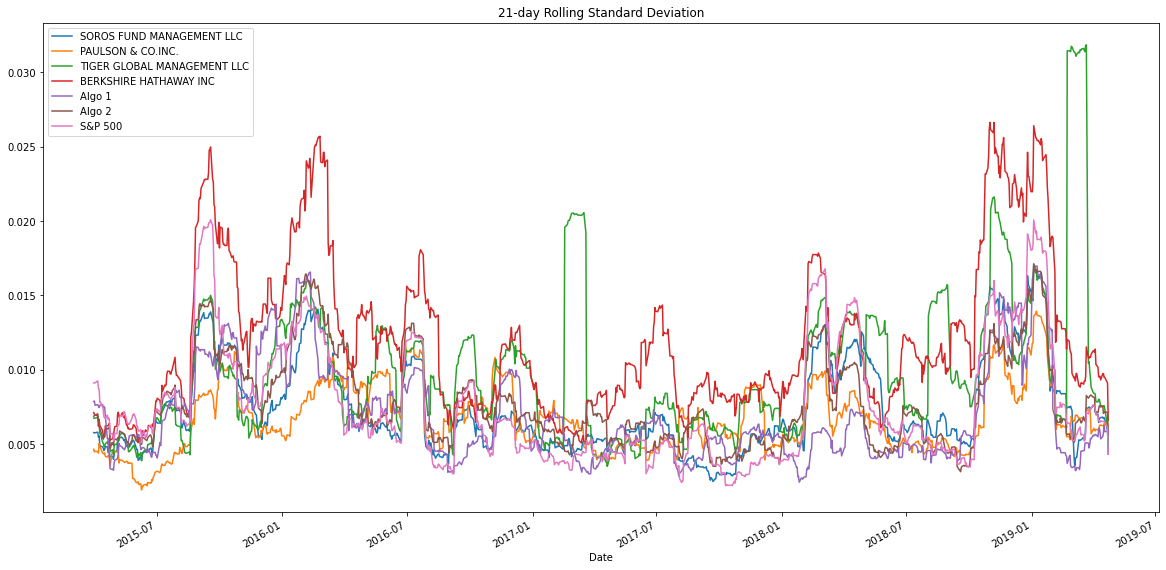

In [40]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
all_daily_returns.rolling(window=21).std().plot(title="21-day Rolling Standard Deviation", figsize=(20,10), legend=True);

## *Rolling STD Analysis*

It appears the risk for each portfolio generally increases when the risk of the S&P 500 increases.

In [41]:
# Construct a correlation table
corr_daily_returns = all_daily_returns.corr()
corr_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


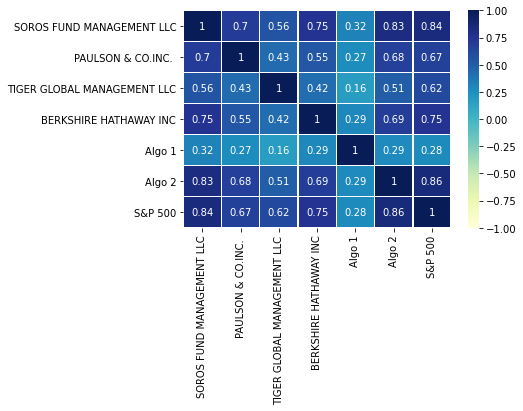

In [42]:
sns.heatmap(corr_daily_returns, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

## *Correlation Analysis*

The returns which most closely mimic the S&P 500 are Algo 2 and Soros Management LLC, followed by Berkshire.

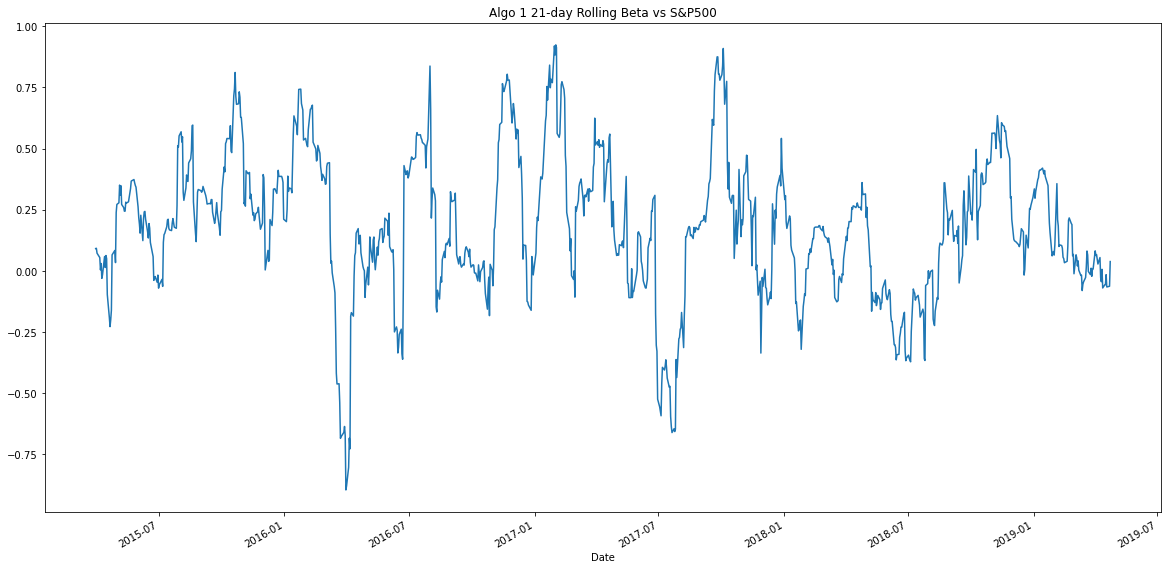

In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

rolling_covariance_algo1 = all_daily_returns['Algo 1'].rolling(window=21).cov(all_daily_returns['S&P 500'])
rolling_variance_algo1 = all_daily_returns['S&P 500'].rolling(window=21).var()
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance_algo1

rolling_beta_algo1.plot(title="Algo 1 21-day Rolling Beta vs S&P500", figsize=(20,10));

## *Beta Analysis for Algo 1 vs. S&P 500*

Algo 1 portfolio seems sensitive to movements in the S&P 500.

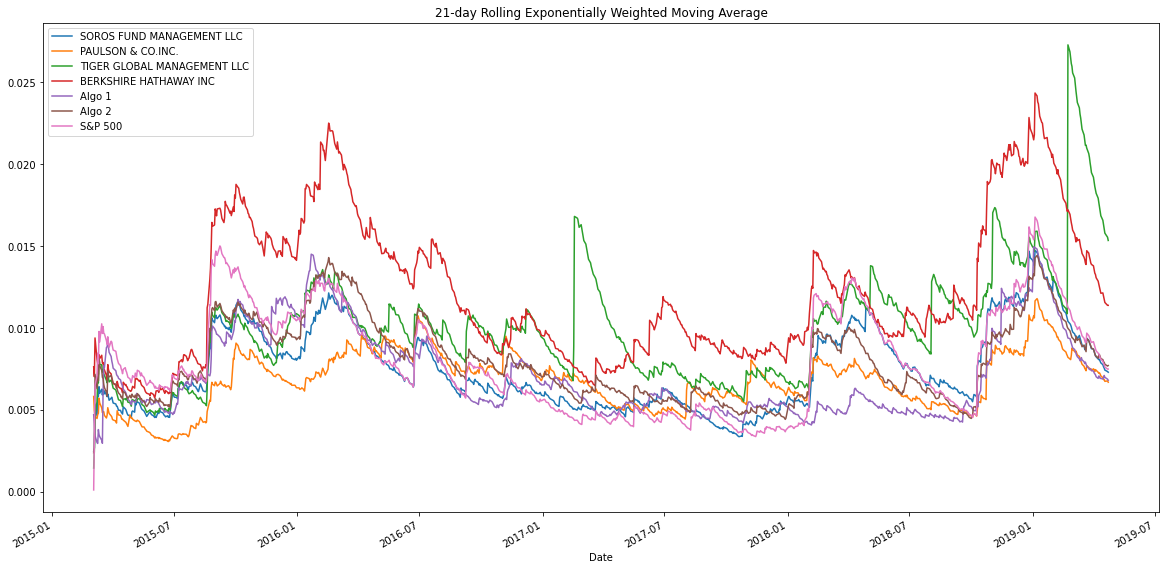

In [44]:
# Calculate a rolling window using the exponentially weighted moving average. 
all_daily_returns.ewm(halflife=21).std().plot(title="21-day Rolling Exponentially Weighted Moving Average", figsize=(20,10), legend=True);

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [45]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

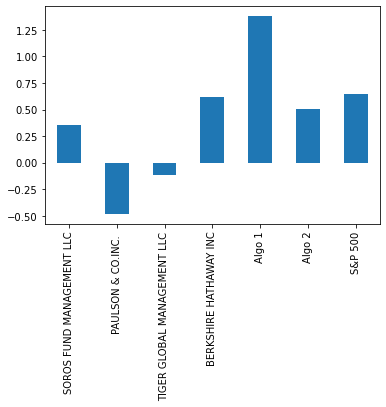

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar');

## *Sharpe Ratios Analysis*

On the basis of this performance metric, the algo strategies that outperform both 'the market' and the whales is Algo 1.
Algo 2 does not outperform both.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [47]:
# Read the first stock
amd_path = Path('Resources/AMD-14-19-dailyclose - Sheet1.csv')
amd_df = pd.read_csv(amd_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
amd_df.sort_index(inplace=True)
amd_df.rename(columns = {"Close":"AMD"}, inplace=True)
amd_df

,AMD
Date,
2014-01-02,3.95
2014-01-03,4.00
2014-01-06,4.13
2014-01-07,4.18
2014-01-08,4.18
...,...
2019-12-24,46.54
2019-12-26,46.63
2019-12-27,46.18


In [48]:
# Read the second stock
dis_path = Path('Resources/DIS-14-19-dailyclose - Sheet1.csv')
dis_df = pd.read_csv(dis_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
dis_df.sort_index(inplace=True)
dis_df.rename(columns = {"Close":"DIS"}, inplace=True)
dis_df

,DIS
Date,
2014-01-02,76.27
2014-01-03,76.11
2014-01-06,75.82
2014-01-07,76.34
2014-01-08,75.22
...,...
2019-12-24,145.29
2019-12-26,145.70
2019-12-27,145.75


In [49]:
# Read the third stock
gwph_path = Path('Resources/GWPH-14-19-dailyclose - Sheet1.csv')
gwph_df = pd.read_csv(gwph_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
gwph_df.sort_index(inplace=True)
gwph_df.rename(columns = {"Close":"GWPH"}, inplace=True)
gwph_df

,GWPH
Date,
2014-01-02,40.58
2014-01-03,40.43
2014-01-06,38.39
2014-01-07,38.20
2014-01-08,38.06
...,...
2019-12-24,105.24
2019-12-26,101.85
2019-12-27,100.61


In [50]:
# Read the fourth stock
msft_path = Path('Resources/MSFT-14-19-dailyclose - Sheet1.csv')
msft_df = pd.read_csv(msft_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_df.sort_index(inplace=True)
msft_df.rename(columns = {"Close":"MSFT"}, inplace=True)
msft_df

,MSFT
Date,
2014-01-02,37.16
2014-01-03,36.91
2014-01-06,36.13
2014-01-07,36.41
2014-01-08,35.76
...,...
2019-12-24,157.38
2019-12-26,158.67
2019-12-27,158.96


In [51]:
# Read the fifth stock
ups_path = Path('Resources/UPS-14-19-dailyclose - Sheet1.csv')
ups_df = pd.read_csv(ups_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
ups_df.sort_index(inplace=True)
ups_df.rename(columns = {"Close":"UPS"}, inplace=True)
ups_df

,UPS
Date,
2014-01-02,103.32
2014-01-03,103.09
2014-01-06,101.75
2014-01-07,102.08
2014-01-08,102.00
...,...
2019-12-24,118.33
2019-12-26,119.04
2019-12-27,118.94


In [52]:
# Concatenate all stocks into a single DataFrame
custom_daily_close = pd.concat([amd_df, dis_df, gwph_df, msft_df, ups_df],axis='columns', join='inner')
custom_daily_close


,AMD,DIS,GWPH,MSFT,UPS
Date,,,,,
2014-01-02,3.95,76.27,40.58,37.16,103.32
2014-01-03,4.00,76.11,40.43,36.91,103.09
2014-01-06,4.13,75.82,38.39,36.13,101.75
2014-01-07,4.18,76.34,38.20,36.41,102.08
2014-01-08,4.18,75.22,38.06,35.76,102.00
...,...,...,...,...,...
2019-12-24,46.54,145.29,105.24,157.38,118.33
2019-12-26,46.63,145.70,101.85,158.67,119.04
2019-12-27,46.18,145.75,100.61,158.96,118.94


In [53]:
# Reset the index
custom_daily_close.reset_index()

,Date,AMD,DIS,GWPH,MSFT,UPS
0,2014-01-02,3.95,76.27,40.58,37.16,103.32
1,2014-01-03,4.00,76.11,40.43,36.91,103.09
2,2014-01-06,4.13,75.82,38.39,36.13,101.75
3,2014-01-07,4.18,76.34,38.20,36.41,102.08
4,2014-01-08,4.18,75.22,38.06,35.76,102.00
...,...,...,...,...,...,...
1505,2019-12-24,46.54,145.29,105.24,157.38,118.33
1506,2019-12-26,46.63,145.70,101.85,158.67,119.04
1507,2019-12-27,46.18,145.75,100.61,158.96,118.94
1508,2019-12-30,45.52,143.77,102.01,157.59,116.44


In [54]:
# Pivot so that each column of prices represents a unique symbol
custom_pivot = pd.pivot_table(custom_daily_close, index=["Date"], values=["AMD", "DIS", "GWPH", "MSFT", "UPS"])
custom_pivot

,AMD,DIS,GWPH,MSFT,UPS
Date,,,,,
2014-01-02,3.95,76.27,40.58,37.16,103.32
2014-01-03,4.00,76.11,40.43,36.91,103.09
2014-01-06,4.13,75.82,38.39,36.13,101.75
2014-01-07,4.18,76.34,38.20,36.41,102.08
2014-01-08,4.18,75.22,38.06,35.76,102.00
...,...,...,...,...,...
2019-12-24,46.54,145.29,105.24,157.38,118.33
2019-12-26,46.63,145.70,101.85,158.67,119.04
2019-12-27,46.18,145.75,100.61,158.96,118.94


In [55]:
# Drop Nulls
custom_pivot.dropna()
custom_pivot.isnull().sum()

AMD     0
DIS     0
GWPH    0
MSFT    0
UPS     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [56]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5,1/5,1/5]
custom_daily_returns = custom_pivot.pct_change()
custom_daily_returns.dropna(inplace=True)
custom_weighted_returns = custom_daily_returns.dot(weights)
custom_weighted_returns

Date
2014-01-03   -0.000418
2014-01-06   -0.011180
2014-01-07    0.005002
2014-01-08   -0.007394
2014-01-09    0.040770
                ...   
2019-12-24    0.006760
2019-12-26   -0.002652
2019-12-27   -0.004099
2019-12-30   -0.008720
2019-12-31    0.008894
Length: 1509, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [57]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_added_all_returns = pd.concat([all_daily_returns, custom_weighted_returns], axis='columns', join='inner')
custom_added_all_returns.rename(columns={0:'Custom'}, inplace=True)
custom_added_all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.008890
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005265
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.001424
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.009237
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.005777
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000756
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.006319
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004646


In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_added_all_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.008890
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005265
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.001424
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.009237
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.005777
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000756
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.006319
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004646


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

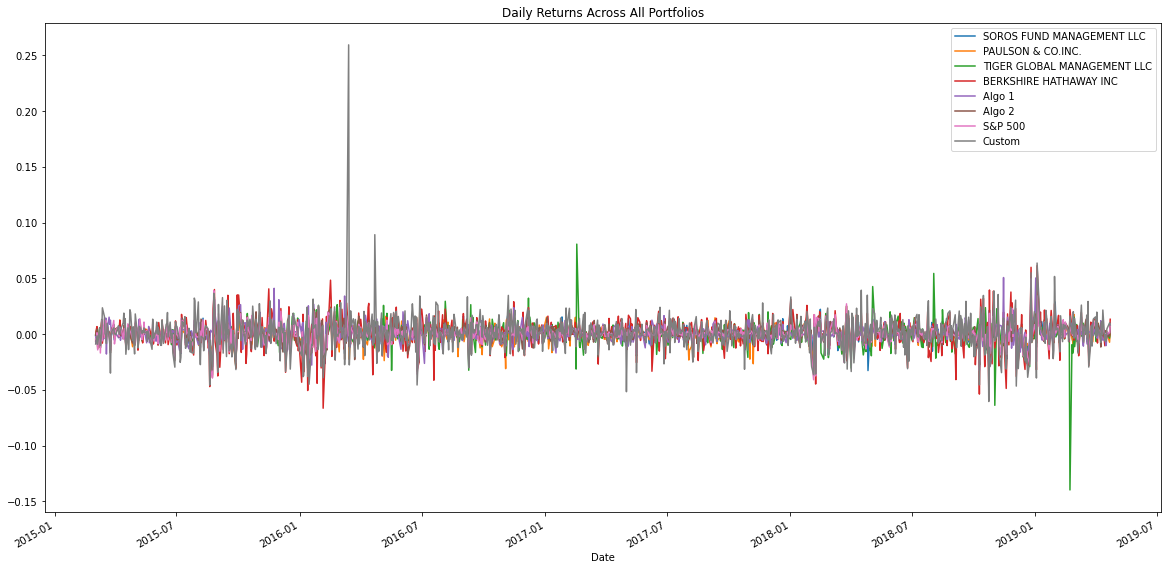

In [59]:
#Performance
custom_added_all_returns.plot(title="Daily Returns Across All Portfolios", figsize=(20,10), legend=True);

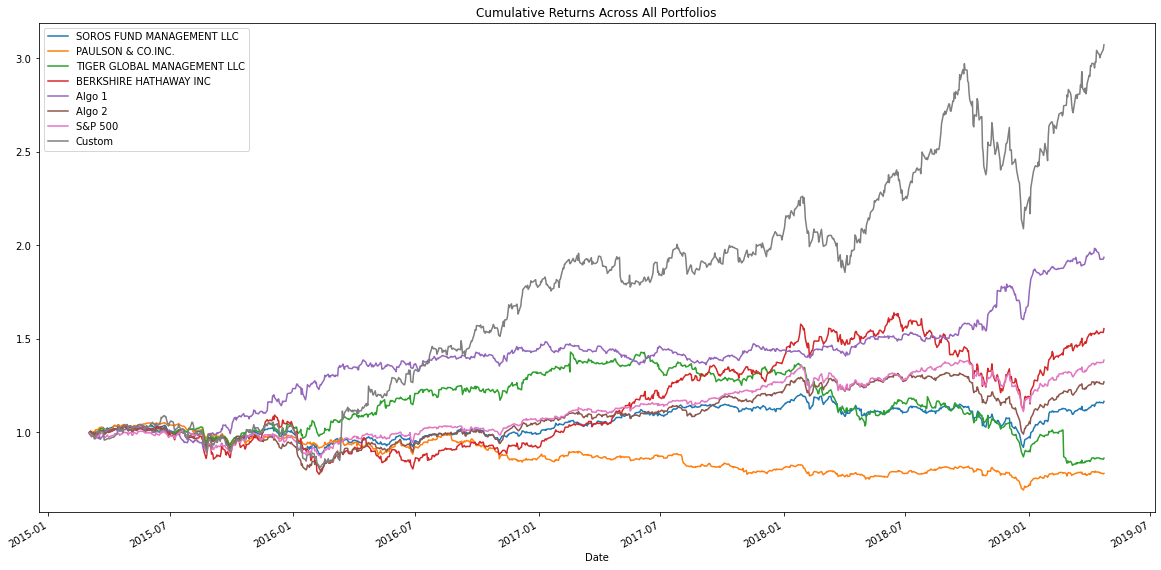

In [60]:
#Cumulative Returns
custom_added_cumu_returns = (1 + custom_added_all_returns).cumprod()
custom_added_cumu_returns.plot(title="Cumulative Returns Across All Portfolios", figsize=(20,10), legend=True);

## *Custom Portfolio Analysis*

My custom portfolio with AMD, DIS, GWPH, MSFT, and UPS outperforms all other portfolios in this time range.

In [61]:
# Risk
# Standard Deviation
custom_added_std = custom_added_all_returns.std()
custom_added_std.sort_values(ascending=False)

Custom                         0.016148
BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

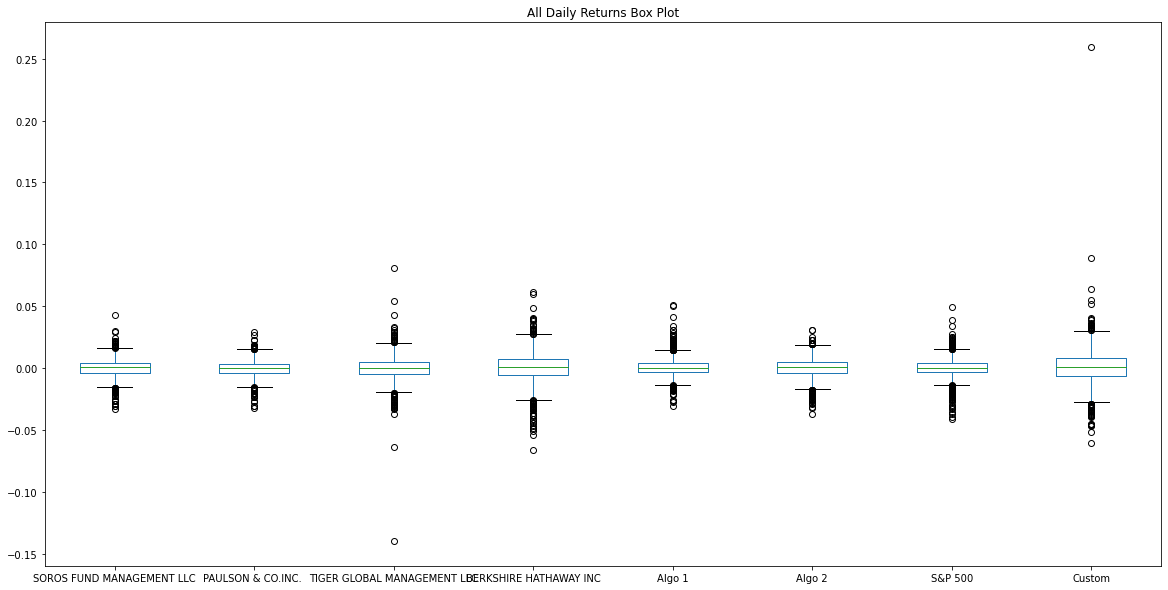

In [62]:
custom_added_all_returns.plot.box(title="All Daily Returns Box Plot", figsize=(20,10), legend=True);

In [63]:
# Annualized STD
custom_added_annualized_std = custom_added_std * np.sqrt(252)
custom_added_annualized_std.sort_values(ascending=False)

Custom                         0.256344
BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

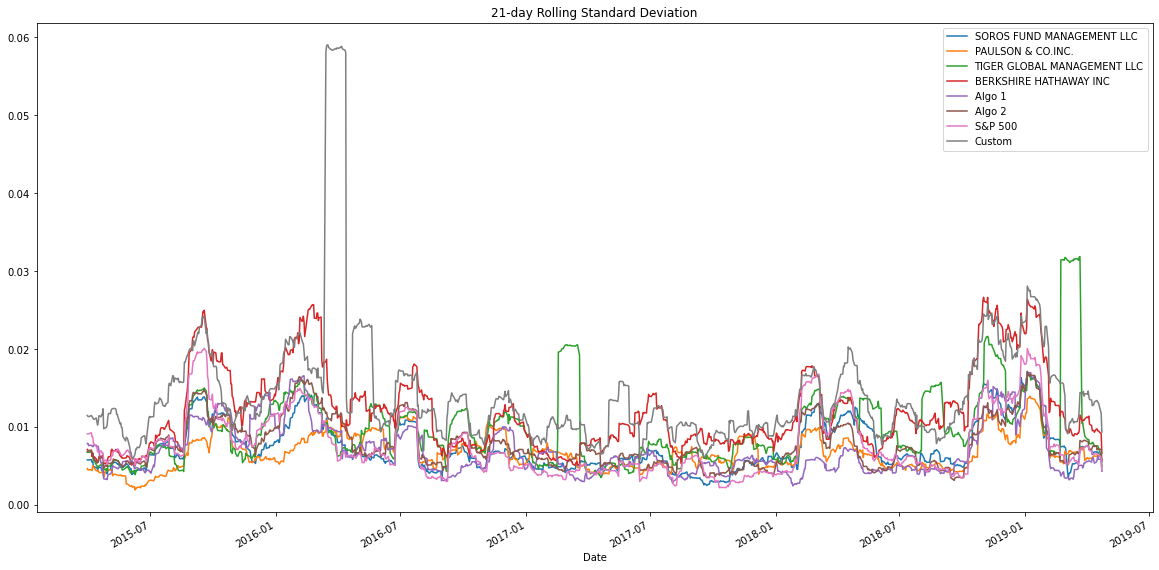

In [64]:
# Rolling Annualized STD
custom_added_all_returns.rolling(window=21).std().plot(title="21-day Rolling Standard Deviation", figsize=(20,10), legend=True);

In [65]:
# Annualized Sharpe Ratios
custom_added_sharpe_ratios = (custom_added_all_returns.mean() * 252) / (custom_added_all_returns.std() * np.sqrt(252))
custom_added_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
Custom                         1.181292
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

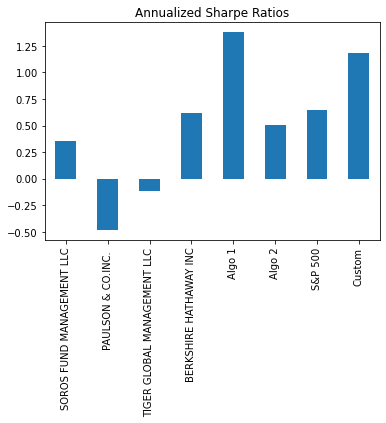

In [66]:
# Visualize the sharpe ratios as a bar plot
custom_added_sharpe_ratios.plot(title="Annualized Sharpe Ratios",kind="bar");

In [67]:
# Create a correlation analysis
correlated_all_returns = custom_added_all_returns.corr()

<AxesSubplot:>

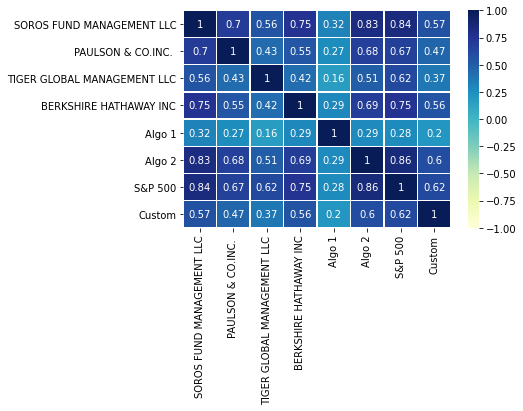

In [68]:
sns.heatmap(correlated_all_returns, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

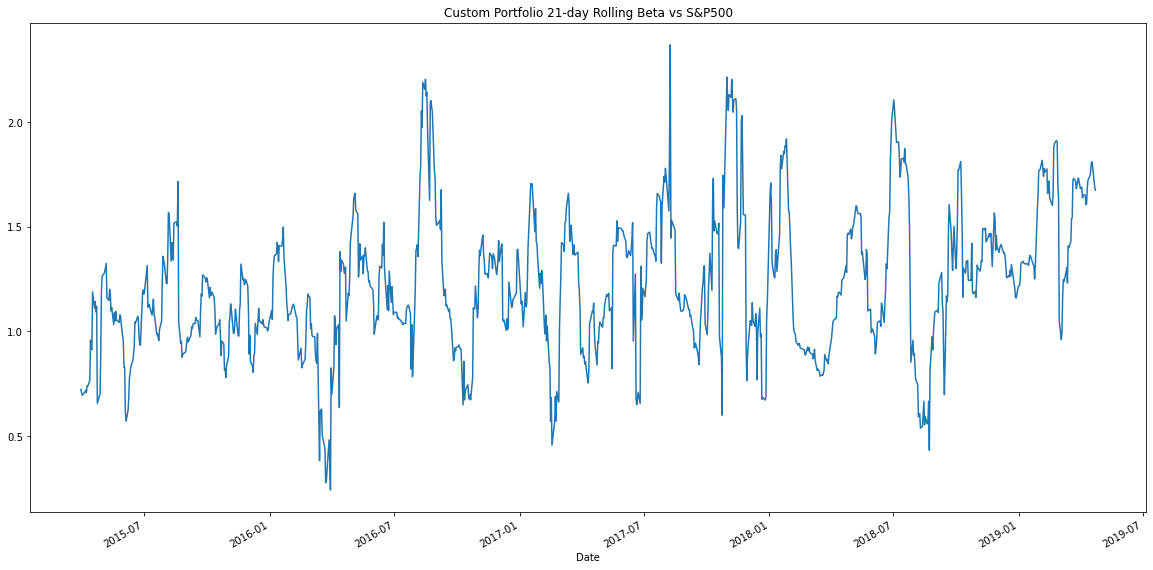

In [69]:
# Beta of custom portfolio compared to the total market (S&P 500)

rolling_covariance_custom = custom_added_all_returns['Custom'].rolling(window=21).cov(custom_added_all_returns['S&P 500'])
rolling_variance_sp500 = custom_added_all_returns['S&P 500'].rolling(window=21).var()
rolling_beta_custom = rolling_covariance_custom / rolling_variance_sp500

rolling_beta_custom.plot(title="Custom Portfolio 21-day Rolling Beta vs S&P500", figsize=(20,10));

## *Custom Portfolio Beta Analysis*

My custom portoflio is highly volatile compared to the S&P 500, however, it wildly outperforms all other portfolios in this analysis.